<a href="https://colab.research.google.com/github/treezy254/Data-Science-Prep/blob/master/red-wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A single neuron

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large', titleweight='bold', titlesize=18, titlepad=10)


In [21]:
import pandas as pd

red_wine = pd.read_csv('winequality-red.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [22]:
red_wine.shape
print(X_train.shape)

(1119, 11)


In [23]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [24]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [27]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    batch_size=256,
    epochs =10,
)

Epoch 1/10
5/5 [==============================] - 2s 94ms/step - loss: 0.2702 - val_loss: 0.1344
Epoch 2/10
5/5 [==============================] - 0s 45ms/step - loss: 0.1439 - val_loss: 0.1269
Epoch 3/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1261 - val_loss: 0.1172
Epoch 4/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1142 - val_loss: 0.1083
Epoch 5/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1128 - val_loss: 0.1190
Epoch 6/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1101 - val_loss: 0.1049
Epoch 7/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1080 - val_loss: 0.1093
Epoch 8/10
5/5 [==============================] - 0s 31ms/step - loss: 0.1063 - val_loss: 0.1016
Epoch 9/10
5/5 [==============================] - 0s 32ms/step - loss: 0.1040 - val_loss: 0.1005
Epoch 10/10
5/5 [==============================] - 0s 30ms/step - loss: 0.1032 - val_loss: 0.1066


<AxesSubplot:>

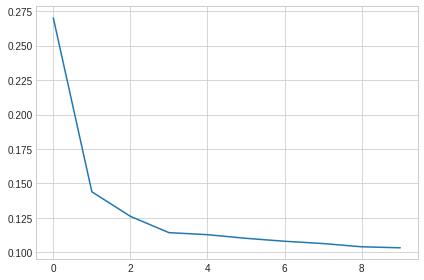

In [28]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()

4/4 [==============================] - 0s 3ms/step


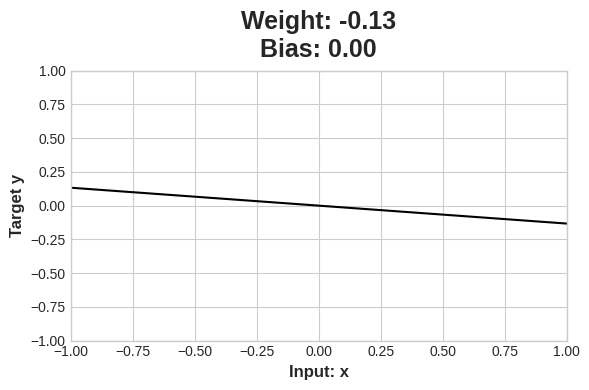

In [29]:
import tensorflow as tf

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

In [ ]:
# Stochastic Gradient Descent
